In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
data = pd.read_csv("/content/gdrive/MyDrive/Satelite_Numeric_data/New Dataset 5000.csv")

In [ ]:
data.shape

(5091, 16)

In [ ]:
data.head(5)

StationId        Datetime  PM2.5  PM10    NO    NO2    NOx    NH3    CO  \
0     TG002  5/14/2018 0:00  35.25  88.5  2.12  33.10  19.30  14.10  0.96   
1     TG002  5/14/2018 1:00  32.00  73.5  2.17  20.30  12.60  13.80  0.17   
2     TG002  5/14/2018 2:00  20.50  58.0  3.00  17.35  11.65  13.48  1.53   
3     TG002  5/14/2018 3:00  21.00  50.0  2.73  18.28  11.93  13.50  2.96   
4     TG002  5/14/2018 4:00  18.50  43.5  2.20  16.38  10.45  15.13  3.49   

    SO2     O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  1.97  67.25     4.98     7.43    2.70  168   Moderate  
1  2.77  80.75     3.40     4.27    1.57  124   Moderate  
2  2.95  77.22     2.02     2.55    1.18  124   Moderate  
3  2.02  36.35     1.42     1.57    0.80  124   Moderate  
4  2.20  70.90     1.20     1.10    1.03  124   Moderate

In [ ]:
df = data.drop(['StationId', 'Datetime', 'AQI_Bucket'], axis=1)

In [ ]:
df

PM2.5    PM10     NO     NO2    NOx    NH3    CO   SO2     O3  Benzene  \
0     35.25   88.50   2.12   33.10  19.30  14.10  0.96  1.97  67.25     4.98   
1     32.00   73.50   2.17   20.30  12.60  13.80  0.17  2.77  80.75     3.40   
2     20.50   58.00   3.00   17.35  11.65  13.48  1.53  2.95  77.22     2.02   
3     21.00   50.00   2.73   18.28  11.93  13.50  2.96  2.02  36.35     1.42   
4     18.50   43.50   2.20   16.38  10.45  15.13  3.49  2.20  70.90     1.20   
...     ...     ...    ...     ...    ...    ...   ...   ...    ...      ...   
5086  40.75   93.75   3.55   91.53  51.58  17.98  0.87  3.45  42.12     3.30   
5087  64.25  151.75   4.97  121.20  68.53  21.15  1.21  3.00  13.75     6.22   
5088  82.25  179.50  17.82  142.17  90.10  20.10  1.48  4.05   2.42     8.55   
5089  78.25  165.00  22.60  144.02  94.95  20.75  1.45  3.97   1.20     9.62   
5090  75.50  160.75  12.47  134.22  81.55  21.70  1.29  2.00   4.97     9.65   

      Toluene  Xylene  AQI  
0        7.43    2.70  168  
1        4.27    1.57  124  
2        2.55    1.18  124  
3        1.57    0.80  124  
4        1.10    1.03  124  
...       ...     ...  ...  
5086     7.35    3.00  106  
5087    16.48    8.20  106  
5088    23.40   12.93  106  
5089    24.93   15.65  107  
5090    22.52   15.62  108  

[5091 rows x 13 columns]

In [ ]:
X = df.loc[:, 'NO':'Xylene'].values
y = df['AQI'].values

In [ ]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.2)


In [ ]:
trainX.shape

(4072, 10)

In [ ]:
testX.shape

(1019, 10)

In [ ]:
trainY.shape

(4072,)

In [ ]:
testY.shape

(1019,)

In [ ]:
sc=StandardScaler()

scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

In [ ]:
from sklearn.neural_network import MLPRegressor

mlp_reg = MLPRegressor(hidden_layer_sizes=(150,100,50),
                       max_iter = 300,activation = 'relu',
                       solver = 'adam')

mlp_reg.fit(trainX_scaled, trainY)

MLPRegressor(hidden_layer_sizes=(150, 100, 50), max_iter=300)

In [ ]:
y_pred = mlp_reg.predict(testX_scaled)


In [ ]:
df_temp = pd.DataFrame({'Actual': testY, 'Predicted': y_pred})
df_temp.head()

Actual   Predicted
0      79  103.753548
1      82   58.379740
2      57   43.198738
3      70   73.863549
4     104  121.676752

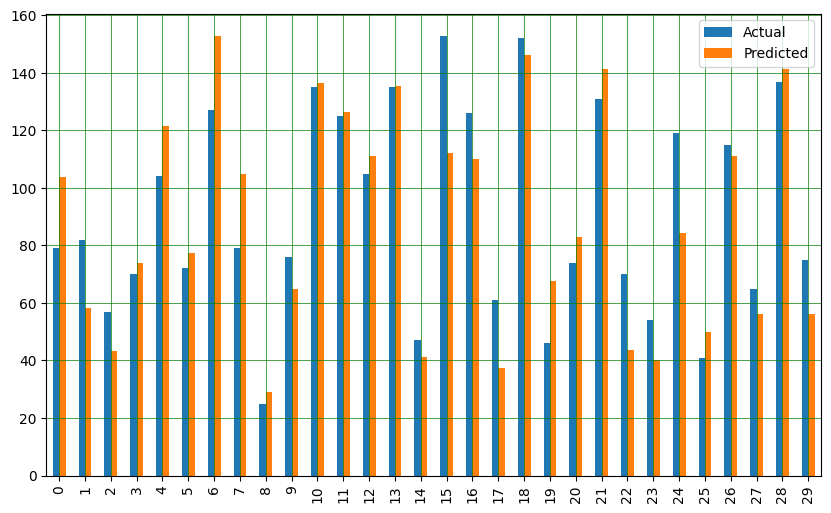

In [ ]:
import matplotlib.pyplot as plt
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
from sklearn import metrics

from sklearn.model_selection import GridSearchCV
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(testY, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, y_pred)))

Mean Absolute Error: 12.473621690573113
Mean Squared Error: 270.4844490173162
Root Mean Squared Error: 16.4464114328116


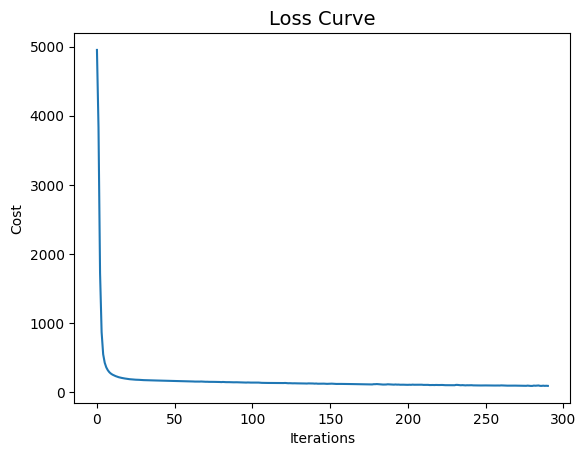

In [ ]:
plt.plot(mlp_reg.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [ ]:
scaler = StandardScaler()
trainX_scaled = scaler.fit_transform(trainX_scaled)

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 300],
    'activation': ['tanh', 'relu'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
grid = GridSearchCV(mlp_reg, param_grid, n_jobs= 4, cv=5)
grid.fit(trainX_scaled, trainY)

print(grid.best_params_)

KeyboardInterrupt: ignored

In [ ]:
grid_predictions = grid.predict(testX_scaled)


In [ ]:
df_temp2 = pd.DataFrame({'Actual': testY, 'Predicted': grid_predictions})
df_temp2.head()

In [ ]:
df_temp2 = df_temp2.head(30)
df_temp2.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()